<a href="https://colab.research.google.com/github/Johyeonje/Start_Tensorflow_2.0_Programming/blob/master/Start!_chap8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import Image

#사전 훈련된 모델 다루기

##8.1 텐서플로 허브

: 텐서플로에서 제공하는 텐서플로 허브는 `재사용 가능한 모델을 쉽게 이용할 수 있는 라이브러리`이다.    
홈페이지에서 이미지, 텍스트, 비디오 등의 분야에서 사전 훈련된 모델들을 검색해볼 수 있다.    
tensorflow 2.0을 사용하면 따로 설치할 필요 없이 텐서플로 허브를 라이브러리로 불러올 수 있다.

###구글 허브에서 모델 불러오기

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

mobile_net_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2"
model = tf.keras.Sequential([
        hub.KerasLayer(handle=mobile_net_url, input_shape=(224, 224, 3), trainable=False)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              3540265   
Total params: 3,540,265
Trainable params: 0
Non-trainable params: 3,540,265
_________________________________________________________________


ImageNetV2의 데이터를 이용해서 불러온 모델을 성능 평가 해보자.

###평가용 데이터 불러오기

In [ ]:
import os
import pathlib
content_data_url = '/content/sample_data'
data_root_orig = tf.keras.utils.get_file('imagenetV2', 'https://s3-us-west-2.amazonaws.com/imagenetv2public/imagenetv2-topimages.tar.gz', 
                                         cache_dir=content_data_url, extract=True)
data_root = pathlib.Path(content_data_url + '/datasets/imagenetv2-top-images-format-val')
print(data_root)

1234968576/1234964480 [==============================] - 35s 0us/step
/content/sample_data/datasets/imagenetv2-top-images-format-val


####get_file()
: 데이터를 불러오는 함수. 이 함수를 이용해서 ImageNetV2 데이터를 불러올 수 있다.    
extract = True로 지정하였기 때문에 colab 가상 머신에 저장됨

###불러온 디렉토리 확인하기

In [ ]:
for idx, item in enumerate(data_root.iterdir()):
  print(item)
  if idx == 9:
    break

/content/sample_data/datasets/imagenetv2-top-images-format-val/143
/content/sample_data/datasets/imagenetv2-top-images-format-val/19
/content/sample_data/datasets/imagenetv2-top-images-format-val/293
/content/sample_data/datasets/imagenetv2-top-images-format-val/198
/content/sample_data/datasets/imagenetv2-top-images-format-val/424
/content/sample_data/datasets/imagenetv2-top-images-format-val/405
/content/sample_data/datasets/imagenetv2-top-images-format-val/978
/content/sample_data/datasets/imagenetv2-top-images-format-val/606
/content/sample_data/datasets/imagenetv2-top-images-format-val/29
/content/sample_data/datasets/imagenetv2-top-images-format-val/250


###레이블 텍스트 불러오기

In [ ]:
label_file = tf.keras.utils.get_file('label', 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
label_text = None
with open(label_file, 'r') as f:
  label_text = f.read().split('\n')[:-1]
print(len(label_text))
print(label_text[:10])
print(label_text[-10:])

16384/10484 [==============================================] - 0s 0us/step
1001
['background', 'tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock', 'hen']
['buckeye', 'coral fungus', 'agaric', 'gyromitra', 'stinkhorn', 'earthstar', 'hen-of-the-woods', 'bolete', 'ear', 'toilet tissue']


###이미지 확인

image_count: 10000


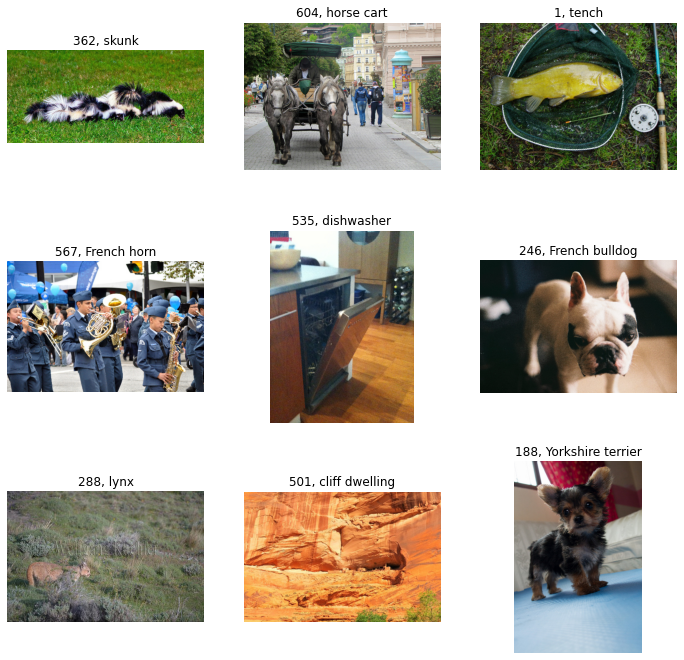

In [ ]:
import PIL.Image as Image
import matplotlib.pyplot as plt
import random

all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
# 이미지를 랜덤하게 섞는다.
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
print('image_count:', image_count)

plt.figure(figsize=(12,12))
for c in range(9):
  image_path = random.choice(all_image_paths)
  plt.subplot(3,3,c+1)
  plt.imshow(plt.imread(image_path))
  idx = int(image_path.split('/')[-2]) +1
  plt.title(str(idx) + ', ' + label_text[idx])
  plt.axis('off')
plt.show()

###MobileNet의 분류 성능 확인

In [ ]:
import numpy as np
import cv2

top_1 = 0
top_5 = 0
for image_path in all_image_paths:
  img = cv2.imread(image_path)
  img = cv2.resize(img, dsize=(224,224))
  img = img / 255.0
  img = np.expand_dims(img, axis=0)
  top_5_predict = model.predict(img)[0].argsort()[::-1][:5]
  idx = int(image_path.split('/')[-2])+1
  if idx in top_5_predict:
    top_5 += 1
    if top_5_predict[0] == idx:
      top_1 += 1

print('Top-5 correctness:', top_5 / len(all_image_paths) * 100, '%')
print('Top-1 correctness:', top_1 / len(all_image_paths) * 100, '%')

KeyboardInterrupt: ignored

Top-5 정확도를 측정하기 위한 top_5_predict를 구한다.

####expand_dims(data, axis=n)

: data에 대해서 n번째 차원을 추가한다. (차원은 바깥부터 센다)    
예시 : 
```python
a = [1,2,3]
b = np.expand_dims(a, axis = 0)
c = np.expand_dims(a, axis = 1)
print(b)
print(c)
```
결과 : `[[1,2,3]]`    
`[[1],[2],[3]]`

####numpy.argsort()
: 값을 정렬하는 대신 인덱스를 정렬한다.
[99,32,5,64]라는 넘파이 array을 sort()와 argsort()를 사용하면 각각 다음과 같은 값을 얻게 된다.


In [ ]:
a = np.array([99,32,5,64])
arg = np.argsort(a)
print(arg)
print(np.sort(a))
print(a[arg])

[2 1 3 0]
[ 5 32 64 99]
[ 5 32 64 99]


argsort() 결과를 다시 원래의 넘파이 array에 넣으면 정렬된 넘파이 array, 즉 sort()를 사용한 것과 같은 결과를 얻는다. 얻고자하는 것은 예측 순서가 높은 순이기 떄문에 [::-1]로 반전 시긴 컷이고 top 5를 의미하는 array[:5]로 잘라서 top_5_predict에 저장한 것이다.

###예측한 Top-5 정보의 시각화

In [ ]:
plt.figure(figsize=(16,16))

def softmax(x):
  e_x = np.exp(x-np.max(x))
  return e_x / e_x.sum(axis=0)

for c in range(3):
  image_path = random.choice(all_image_paths)

  # 이미지 시각화
  plt.subplot(3,2,c*2+1)
  plt.imshow(plt.imread(image_path))
  idx = int(image_path.split('/')[-2])+1
  plt.title(str(idx) + ', ' + label_text[idx])
  plt.axis('off')

  # 예측값 시각화
  plt.subplot(3,2,c*2+2)
  img = cv2.imread(image_path)
  img = cv2.resize(img, dsize=(224,224))
  img = img / 255.0
  img = np.expand_dims(img, axis=0)

  # MobileNet을 이용한 예측
  logits = model.predict(img)[0]
  prediction = softmax(logits)

  # 가장 높은 확률의 예측값 5개를 뽑음
  top_5_predict = prediction.argsort()[::-1][:5]
  labels = [label_text[index] for index in top_5_predict]
  color = ['gray'] * 5
  if idx in top_5_predict:
    color[top_5_predict.tolist().index(idx)] = 'green'
  color = color[::-1]
  plt.barh(range(5), prediction[top_5_predict][::-1] * 100, color=color)
  plt.yticks(range(5), labels[::-1])

## 8.2 전이 학습

: `미리 훈련된 모델을 다른 작업에 사용하기 위해 추가적인 학습을 시키는 것.`    
이때 훈련된 모델은 유의미한 특징(feature)을 뽑아내기 위한 특징 추출기(Feature Extractor)로 쓰이거나, 모델의 일부를 재학습시키기도 한다.

###모델의 일부를 재학습 시키기

미리 학습된 컨볼루션 레이어를 활용하여 새로운 신경망을 구성할 때에는 다음과 같은 방법이 있다.    
1. Dense 출력층 하나만 붙이기
2. Drop out 을 포함한 여러 Dense 층 붙이기

층을 다음과 같은 방법으로 구성하게되면 재학습 때에도 여러 방법이 있다.    
모든 층을 학습시키는 방법만이 있는 것이 아닌 일부 층을 학습시키기도 하기 때문이다.    
1. 출력층 하나만 학습하기
2. Drop out을 포함한 여러 Dense 층 학습하기
3. 컨볼루션 레이어의 일부 또는 전체도 Dense 층과 함께 학습하기

이때 학습에 영향을 받지 않는 것을 '얼린다(freeze)'라고 표현한다.    
`얼릴지 말지에 대한 선택은 데이터 양에 따라 결정`되는데 새로 학습하는 데이터양이 많을 경우 기존 훈련된 데이터와 차이가 많아져서 다시 학습할 필요가 생기기 때문이다.


Dogs Dataset은 ImageNet보다는 훨씬 적은 양의 데이터이면서 분류의 수도 아주 적지 않기 때문에 전이 학습에 적당한 데이터이다.    
여기서는 원본 데이터보다 접근이 쉬운 캐글(Kaggle)의 데이터 세트를 사용한다.

캐글 API를 내려받기 위해 셀에서 사용하는 명령

In [ ]:
!pip install kaggle

In [ ]:
!pip uninstall -y kaggle
!pip install -—upgrade pip
!pip install kaggle==1.5.6
!kaggle -v

Uninstalling kaggle-1.5.6:
  Successfully uninstalled kaggle-1.5.6

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -—
     |████████████████████████████████| 61kB 3.5MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-cp36-none-any.whl size=72859 sha256=a0cf93ea6f6833e8d42e790a7169d00b6dd46e572fcdbddadda6022c82cd22a3
  Stored in directory: /root/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
Successfully built kaggle
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.6/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/py

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'ysodam'
os.environ['KAGGLE_KEY'] = 'e7b16b954ebca5fe366673ea1fc32496'
!kaggle competitions download -c dog-breed-identification

100% 691M/691M [00:08<00:00, 51.8MB/s]
100% 691M/691M [00:08<00:00, 90.3MB/s]


####압출풀기

In [ ]:
!unzip dog-breed-identification.zip
!unzip train.zip
!unzip labels.csv.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: train/83fad0718581a696132c96c166472627.jpg  
  inflating: train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: train/840db91ba4600148f3dcb06ec419b421.jpg  
  inflating: train/840dbad5a691c22611d85b2488bf4cbb.jpg  
  inflating: train/8410ced9ebc1759a7ebce5c42bfb5222.jpg  
  inflating: train/841463629c4833816e216cbb041c2778.jpg  
  inflating: train/8429dcca4ae91c4e0345e4ba48b0d69f.jpg  
  inflating: train/842e3c6e44fda4102fe83d07dac72b3e.jpg  
  inflating: train/8431a6ce7c70e5e36

####정보확인

In [ ]:
import pandas as pd
label_text = pd.read_csv('labels.csv')
print(label_text.head())

                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
label_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


In [ ]:
label_text['breed'].nunique()

120

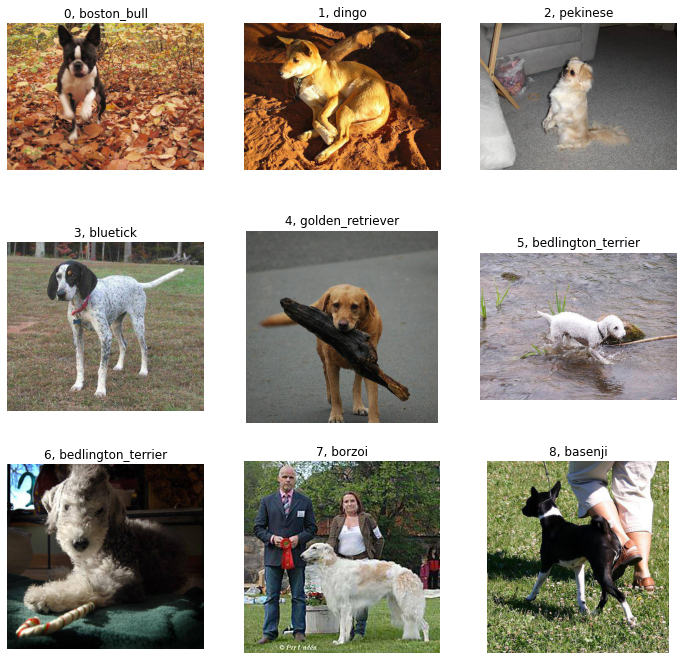

In [ ]:
import PIL.Image as Image
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
for c in range(9):
  image_id = label_text.loc[c, 'id']
  plt.subplot(3,3,c+1)
  plt.imshow(plt.imread('/content/train/' + image_id + '.jpg'))
  plt.title(str(c) + ', ' + label_text.loc[c, 'breed'])
  plt.axis('off')
plt.show()

전이 학습을 사용하기 전에 먼저 이 문제가 얼마나 어려운지 확인하기 위해서 가중치를 초기화 한 후에 학습시켜보고 비교해보자.

####전이학습이 아닐 때와 비교

#####가중치 초기화

In [ ]:
from tensorflow.keras.applications import MobileNetV2
mobilev2 = MobileNetV2()

14540800/14536120 [==============================] - 0s 0us/step


In [ ]:
import tensorflow as tf
import numpy as np

for layer in mobilev2.layers[:-1]:
  layer.trainable = True

for layer in mobilev2.layers[:-1]:
  if 'kernel' in layer.__dict__:
    kernel_shape = np.array(layer.get_weights()).shape
    # weight를 평균이 0, 표준편차가 1인 random 변수로 초기화
    layer.set_weights(tf.random.normal(kernel_shape, 0, 1))

kernel이 가중치이고 bias가 편향 b를 의미한다. MobileNetV2에는 bias가 존재하지 않기 때문에 kernel만을 초기화한다.

#####train_X 데이터 생성

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import os

train_X = []
label_text = label_text[:1000]
for i in range(len(label_text)):
  img = cv2.imread('/content/train/' + label_text['id'][i] + '.jpg')
  img = cv2.resize(img, dsize=(224,224))
  img = img / 255.0
  train_X.append(img)
train_X = np.array(train_X)
print(train_X.shape)
print(train_X.size * train_X.itemsize, ' bytes')

(1000, 224, 224, 3)
1204224000  bytes


#####라벨링

라벨을 불러와 중복값을 삭제한 후 train_Y에 라벨에 맞게 인덱스 라벨 데이터 생성 후 학습에 이용하기 위해 다시 numpy array화

In [ ]:
label_text['breed']

0             boston_bull
1                   dingo
2                pekinese
3                bluetick
4        golden_retriever
              ...        
995    kerry_blue_terrier
996              pekinese
997            schipperke
998       tibetan_mastiff
999       irish_wolfhound
Name: breed, Length: 1000, dtype: object

breed는 견종에 대한 스트링을 나열해놓은 데이터인데 이 데이터에서 중복값을 제거한 견종에 대한 인덱스 리스트를 생성하고,    
다시 라벨 데이터에 인덱스 리스트를 기반으로 알맞은 라벨링을 진행한다.

In [ ]:
unique_Y = label_text['breed'].unique().tolist()
train_Y = [unique_Y.index(breed) for breed in label_text['breed']]
train_Y = np.array(train_Y)

print(train_Y[:10])
print(train_Y[-10:])

[0 1 2 3 4 5 5 6 7 8]
[ 16  56 102  49  90  98   2  43 116  79]


#####전이학습의 모델 정의

In [ ]:
x = mobilev2.layers[-2].output
predictions = tf.keras.layers.Dense(120, activation='softmax')(x)
model = tf.keras.Model(inputs=mobilev2.input, outputs=predictions)

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

첫번째 줄엫서는 마지막 Dense 레이어를 제외하기 위해 뒤에서 두번재를 지정해서 그 레이어의 output을 x라는 변수에 저장하고, Dogs Dataset의 분류를 위해 120개 뉴련을 가진 Dense 레이어를 새롭게 만든다.

In [ ]:
predictions = tf.keras.layers.Dense(120, activation='softmax')(x)

위의 코드에 레이어를 함수처럼 사용하는 구문을 **함수형(functional) API**라고 한다. 입력부터 출력까지 일직선의 구조라면 시퀀셜 모델을 사용해도 되지만, 그렇지 않은 경우에는 함수형 모델을 사용해 모델의 입력, 출력 구조를 정의해야 한다.    
함수형 모델을 정의하기 위해서는 연결에 필요한 모든 레이어를 준비한 다음에 tf.keras.Model()의 인수인 inputs, outputs에 각각 입력과 출력에 해당하는 부분을 넣으면 tf.keras가 그 사이의 연결을 알아서 찾아 모델을 구성한다.    
입력과 출력 사이에 연결이 되지 않으면 에러 발생

In [ ]:
model = tf.keras.Model(inputs=mobilev2.input, outputs=predictions)

In [ ]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_X, train_Y, epochs=10, validation_split=0.25, batch_size=32)

Epoch 1/10
24/24 [==============================] - 10s 425ms/step - loss: 4.9791 - accuracy: 0.0107 - val_loss: 10.4503 - val_accuracy: 0.0080
Epoch 2/10
24/24 [==============================] - 8s 349ms/step - loss: 4.9058 - accuracy: 0.0067 - val_loss: 10.0938 - val_accuracy: 0.0080
Epoch 3/10
24/24 [==============================] - 8s 350ms/step - loss: 4.8725 - accuracy: 0.0160 - val_loss: 9.7179 - val_accuracy: 0.0120
Epoch 4/10
24/24 [==============================] - 8s 349ms/step - loss: 4.8037 - accuracy: 0.0147 - val_loss: 9.1687 - val_accuracy: 0.0080
Epoch 5/10
24/24 [==============================] - 8s 351ms/step - loss: 4.7579 - accuracy: 0.0293 - val_loss: 10.8773 - val_accuracy: 0.0080
Epoch 6/10
 1/24 [>.............................] - ETA: 5s - loss: 4.7061 - accuracy: 0.0625

KeyboardInterrupt: ignored

좋지 않은 결과를 확인할 수 있는데, 훈련 데이터의 정확도는 오르는 반면 검증 데이터의 정확도는 거의 오르지 않고 있다. 거의 120개의 견종중 하나만 랜덤으로 찍을 때의 정확도랑 비슷하다.

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0, 0.1)
plt.legend()

plt.show()

학습이 잘 되지 않고 있다. 이번엔 같은 네트워크로 전이 학습을 시도해보자.    
기존의 가중치를 그대로 사용하고 일부 레이어의 가중치를 고정시킨 상태로 학습한다.

In [ ]:
from tensorflow.keras.applications import MobileNetV2
mobilev2 = MobileNetV2()

x = mobilev2.layers[-2].output
predictions = tf.keras.layers.Dense(120, activation='softmax')(x)
model = tf.keras.Model(inputs=mobilev2.input, outputs=predictions)

for layer in model.layers[:-20]:
  layer.trainable = False
for layer in model.layers[-20:]:
  layer.trainable = True

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________________

In [ ]:
history = model.fit(train_X, train_Y, epochs=10, validation_split=0.25, batch_size=32)

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

같은 네트워크 구조를 사용했지만 val_acc는 56.73%로 1%에 머물던 전 예제와는 전혀 다른 결과이다. 또한 학습시킬 가중치가 줄어들어 학습 평균속도가 1/3까지 감소했다.

###특징 추출기

미리 훈련된 모델에서 데이터의 특징만 추출하고, 그 특징을 작은 네트워크에 통과시켜 정답을 예측하는 방법도 있다. 미리 추출된 특징은 파일로 저장했다가 필요할 때 불러서 사용한다.    
이점 : 학습할 때마다 전체 네트워크의 계산을 반복할 필요가 없다.

In [ ]:
Image('/content/drive/My Drive/DeepLearning/Start!_Tensorflow/images/pretrain_conv.png', width=500)

TypeError: ignored

텐서플로 허브에서 Inception V3(구글이 ImageNet에서 발표한 모델)를 불러온다. 특징 추출기 네트워크를 KerasLayer로 불러온다.

####특징 추출기 불러오기

In [ ]:
import tensorflow_hub as hub

inception_url = 'https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4'
feature_model = tf.keras.Sequential([
              hub.KerasLayer(inception_url, output_shape=(2048,), trainable=False)
])
feature_model.build([None, 299, 299, 3])
feature_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 2048)              21802784  
Total params: 21,802,784
Trainable params: 0
Non-trainable params: 21,802,784
_________________________________________________________________


Inception V3의 마지막 Dense레이어에 넘겨주는 출력의 크기는 2048이고 여기서 불러오는 특징 추출기는 마지막 Dense레이어를 포함하지 않기 때문에 output_shape=(2048,)로 출력 크기를 지정한다.    
이 설정에 의해 Inception V3 특징 추출기는 이미지에서 2048 크기의 특징 벡터를 추출할 수 있다.

#####build()
summary 함수로 모델을 확인하기 위해 compile 함수를 먼저 실행해야 하지만 build 함수를 사용할 수 있다. 네트워크의 input_shape가 특정되지 않았기 때문에 build 함수의 인수로 [None, 299, 299, 3]이라는 입력 데이터의 차원을 정의해 넣는다. 첫번째 차원은 배치 차원이기 때문에 입력이 몇 개가 들어와도 상관없다. None으로 설정하면 어떤 숫자가 들어와도 상관없다는 뜻이다.

####데이터 ImageDataGenerator 적용하기

#####ImageDataGenerator

: 이미지를 한번에 메모리에 올리는 것이 아니라 필요할 때마다 디스크에 배치 크기 만큼 올리는 것. Inception V3의 경우 파라미터의 수가 2100만개나 되기 때문에 colab이 다운되지 않으려면 나눠서 읽어야한다.   
그런데 ImageDataGenerator는 라벨이 있는 데이터를 처리할 떄 각 라벨의 이름을 하위 디렉터리로 가지고 있는 디렉터리를 받아서 처리한다. 반면 내려받은 데이터는 train 폴더에 모든 이미지 파일로 저장되어있다. 따라서 ImageDataGenerator가 처리할 수 있는 방식으로 데이터를 복사하는 작업이 필요하다.

In [ ]:
import os
import shutil

os.mkdir('/content/train_sub')

for i in range(len(label_text)):
  if os.path.exists('/content/train_sub/' + label_text.loc[i]['breed']) == False:
    os.mkdir('/content/train_sub/' + label_text.loc[i]['breed'])
  shutil.copy('/content/train/' + label_text.loc[i]['id'] + '.jpg', '/content/train_sub' + label_text.loc[i]['breed'])

FileExistsError: ignored

먼저 content 폴더 아래에 train_sub라는 디렉터리를 만든 다음, 그 아래에 label_text의 각 데이터의 breed에 해당하는 하위 디렉터리를 만들고 해당 파일을 복사한다. 그럼 레이블 별로 하위 디렉터리가 생긴다.

####데이터 분류

훈련 데이터와 검증 데이터를 분리하고, 훈련 데이터에는 이미지 보강을 적용해 네트워크 성능을 높여보자

In [ ]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_resnet_v2 import preprocess_input

image_size = 299
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255., horizontal_flip=True, shear_range=0.2,
                                   zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.2, validation_split=0.25)
valid_datagen = ImageDataGenerator(rescale=1./255., validation_split=0.25)

train_generator = train_datagen.flow_from_directory(directory="/content/train_sub/",
                  subset="training", batch_size=batch_size, seed=42, shuffle=True, class_mode='categorical', 
                  target_size=(image_size, image_size))
valid_generator = valid_datagen.flow_from_directory(directory="/content/train_sub/",
                  subset="validation", batch_size=1, seed=42, shuffle=True, class_mode="categorical",
                  target_size=(image_size, image_size))

Found 0 images belonging to 120 classes.
Found 0 images belonging to 120 classes.


두 종류의 ImageDataGenerator를 사용하는 이유는 네트워크를 학습시킬 훈련 데이터는 이미지의 보강을 위해 IDG를 사용하고, 검증 데이터에는 별도의 이미지 보강 없이 원본 데이터를 그대로 사용하기 위해서이다. 양쪽 train_generator와 valid_generator의 seed 값을 같은 값으로 맞춰주기 때문에 IDG에는 동일한 training, validation 부분 집합이 생긴다. 이 가운데 train_generator는 training의 부분집합을, valid_generator는 validation 부분집합을 사용한다.

####데이터를 특징 벡터로 변환

변환한 특징 벡터를 작은 시퀀셜 모델에 넣어서 실제 라벨을 예측할 것이다.

In [ ]:
batch_step = (7718*3) // batch_size
print(batch_step)
train_features = []
train_Y = []
for idx in range(batch_step):
  if idx % 100 == 0:
    print(idx)
  x, y = train_generator.next()
  train_Y.extend(y)
  feature = feature_model.predict(x)
  train_features.extned(feature)

train_features = np.array(train_features)
train_Y = np.array(train_Y)
print(train_features.shape)
print(train_Y.shape)

723
0


AttributeError: ignored

x 값은 이미지 데이터에 해당하는 부분으로 특징 추출기를 통과하면 특징 벡터가 된다. 이미 학습이 완료된 특징 추출기를 사용하기 때문에 predict()로 특징 벡터를 추출한다.

최종 출력되는 값의 Shape는 train_features가 (23084, 2048)이고 train_Y가 (20383, 120)이다. 특징 벡터는 2048차원의 벡터임을 알수 있다. 가로 세로 299 픽셀, RGB 3차원 이미지가 2048개의 실수로 바뀌어 데이터 크기가 크게 줄었다.

####검증 데이터를 특징 벡터로 변환

In [ ]:
valid_features = []
valid_Y = []

for idx in range(valid_generator.n):
  if idx % 100 == 0:
    print(idx)
  x, y = valid_generator.next()
  valid_Y.extend(y)

  feature = feature_model.predict(x)
  valid_features.extned(feature)

valid_features = np.array(valid_features)
valid_Y = np.array(valid_Y)
print(valid_features.shape)
print(valid_Y.shape)

(0,)
(0,)


####분류 네트워크 만들기

In [ ]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation='relu', input_shape=(2048,)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(120, activation='softmax')
])

model.compile(tf.optimizers.RMSprop(0.0001), loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               524544    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               30840     
Total params: 555,384
Trainable params: 555,384
Non-trainable params: 0
_________________________________________________________________


sparse가 아닌 categorical을 사용했는데 train_Y의 마지막 차원이 1이 아닌 원-핫 벡터인 120이기 때문이다.

####학습 시작 및 결과 확인

In [ ]:
history = model.fit(train_X, train_Y, epochs=10, validation_split=0.25, batch_size=32)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.8, 1)
plt.legend()

plt.show()

IndexError: ignored

전반적으로 학습이 잘되고 val_accuracy는 90%를 넘기고 있다.    
`특징 추출기를 사용하면 더 많은 파라미터와 큰 이미지를 사용하면서도 학습속도를 획기적으로 줄일 수 있다.`

####라벨 텍스트를 알파벳 순으로 정렬

In [ ]:
unique_sorted_Y = sorted(unique_Y)
print(unique_sorted_Y)

['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale', 'american_staffordshire_terrier', 'appenzeller', 'australian_terrier', 'basenji', 'basset', 'beagle', 'bedlington_terrier', 'bernese_mountain_dog', 'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound', 'bluetick', 'border_collie', 'border_terrier', 'borzoi', 'boston_bull', 'bouvier_des_flandres', 'boxer', 'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff', 'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua', 'chow', 'clumber', 'cocker_spaniel', 'collie', 'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo', 'doberman', 'english_foxhound', 'english_setter', 'english_springer', 'entlebucher', 'eskimo_dog', 'flat-coated_retriever', 'french_bulldog', 'german_shepherd', 'german_short-haired_pointer', 'giant_schnauzer', 'golden_retriever', 'gordon_setter', 'great_dane', 'great_pyrenees', 'greater_swiss_mountain_dog', 'groenendael', 'ibizan_hound', 'irish_setter', 'irish_terrier', 'iris

####breed 이미지로 테스팅

In [ ]:
import random
plt.figure(figsize=(16,16))

for c in range(3):
  image_path = random.choice(valid_generator.filepaths)

  #이미지 표시
  plt.subplot(3,2,c*2+1)
  plt.imshow(plt.imread(image_path))
  real_y = image_path.split('/')[3]
  plt.title(real_y)
  plt.axis('off')
  idx = unique_sorted_Y.index(real_y)

  #예측값 표시
  plt.subplot(3,2,c*2+2)
  img = cv2.imread(image_path)
  img = cv2.resize(img, dsize=(299,299))
  img = img / 255.0
  img = np.expand_dims(img, axis=0)

  #Inception V3를 이용한 특징 벡터 추출
  feature_vector = feature_model.predict(img)

  #시퀀셜 모델을 이용한 예측
  prediction = model.predict(feature_vector)[0]

  #가장 높은 확률의 예측값 5개를 뽑음
  top_5_predict = prediction.argsort()[::-1][:5]
  labels = [unique_sorted_Y[index] for index in top_5_predict]
  color = ['gray']*5
  if idx in top_5_predict:
    color[top_5_predict.tolist().index(idx)] = 'green'
  color = color[::-1]
  plt.barh(range(5), pprediction[top_5_predict][::-1]*100, color=color)
  plt.yticks(range(5), labels[::-1])

IndexError: ignored

<Figure size 1152x1152 with 0 Axes>

아주아주 잘된다.

In [ ]:
!unzip test.zip
!unzip sample_submission.csv.zip

unzip:  cannot find or open test.zip, test.zip.zip or test.zip.ZIP.
unzip:  cannot find or open sample_submission.csv.zip, sample_submission.csv.zip.zip or sample_submission.csv.zip.ZIP.


In [ ]:
import pandas as pd
submission = pd.read_csv('sample_submission.csv')
print(submission.head())
print()
print(submission.info())

FileNotFoundError: ignored

Multiclass logloss는 바로 범주에 대한 크로스엔트로피이다. 모델을 컴파일 할 때 loss를 categoricla_crossentropy로 설정하면 fit() 함수의 출력 창에서 훈련 데이터의 multiclass logloss인 loss와 검증 데이터의 multiclass인 logloss인 val_loss를 확인할 수 있다.

테스트 데이터도 훈련 데이터와 같은 299픽셀 데이터이기 때문에 IDG를 사용한다. 하지만 그러려면 flow_from_directory() 함수로 이미지를 읽어 들이기 위해 하위 디렉터리가 꼭 필요하다. 현재 테스트 데이터는 각 사진이 어떤 범주에 속하는지 알 수 없기 때문에 unknown이라는 디렉터리를 만들고 모든 데이터를 이곳에 복사한다.

In [ ]:
import os
import shutil

os.mkdir('/content/test_sub/')
os.mkdir('/content/test_sub/unknown/')

for i in range(len(submission)):
  shutil.copy('/content/test/' + submission.loc[i]['id'] + '.jpg', '/content/test_sub/unknown/')

FileExistsError: ignored

####ImageDataGenerator 정의

In [ ]:
from tensorflow.python.keras.preprocessing.imge import ImageDataGenerator

test_datagen=ImageDataGenerator(rescale=1./255.)
test_generator=test_datagen.flow_from_directory(directory="/content/test_sub/", batch_size=1,
                                                seed=42, shuffle=False, target_size=(299,299))

ModuleNotFoundError: ignored

In [ ]:
test_features = []

for idx in range(test_generator.n):
  if idx % 100 == 0:
    print(idx)

  x, _ = test_generator.next()
  feature = feature_model.predict(x)
  test_features.extned(feature)

test_features = np.array(test_features)
print(test_features.shape)

NameError: ignored

####실험 결과

각 이미지 데이터는 2048의 길이를 가진 특징 벡터로 변환되었다. 이 특징 젝터로 학습 모델에 넣어 예측해보자

In [ ]:
test_Y = model.predict(test_features, verbose=1)

NameError: ignored

####시각화

In [ ]:
import random
plt.figure(figsize=(16,16))

for c in range(3):
  image_path = random.choice(valid_generator.filepaths)

  #이미지 표시
  plt.subplot(3,2,c*2+1)
  plt.imshow(plt.imread(image_path))
  real_y = image_path.split('/')[3]
  plt.title(real_y)
  plt.axis('off')
  idx = unique_sorted_Y.index(real_y)

  #예측값 표시
  plt.subplot(3,2,c*2+2)
  img = cv2.imread(image_path)
  img = cv2.resize(img, dsize=(299,299))
  img = img / 255.0
  img = np.expand_dims(img, axis=0)

  #Inception V3를 이용한 특징 벡터 추출
  feature_vector = feature_model.predict(img)

  #시퀀셜 모델을 이용한 예측
  prediction = model.predict(feature_vector)[0]

  #가장 높은 확률의 예측값 5개를 뽑음
  top_5_predict = prediction.argsort()[::-1][:5]
  labels = [unique_sorted_Y[index] for index in top_5_predict]
  color = ['gray']*5
  if idx in top_5_predict:
    color[top_5_predict.tolist().index(idx)] = 'green'
  color = color[::-1]
  plt.barh(range(5), pprediction[top_5_predict][::-1]*100, color=color)
  plt.yticks(range(5), labels[::-1])

NameError: ignored

비교적 정확한 결과가 나왔다 이를 실제 캐글에 업로드하기 위해 submission이라는 이름으로 불러온 데이터 프레임에 test_Y로 저장된 예측값을 넣는다.

In [ ]:
for i in range(len(test_Y)):
  for j in range(len(test_Y[i])):
    breed_column = unique_sorted_Y[j]
    submission.loc[i, breed_column] = test_Y[i, j]

print(submission.head())

NameError: ignored

#####iloc[] : 데이터프레임에 인덱스로 접근

####submission 데이터 프레임을 csv 파일로 저장

In [ ]:
submission.to_csv('dogbreed_submission_inceptionV3_epoch10_299.csv', index=False)

NameError: ignored

##8.3 신경 스타일 전이

어떤 이미지던 한 이미지에서 스타일을 한 이미지에서 내용을 가져와 두 이미지의 스타일과 내용이 합성된 제 3의 이미지를 만들어 내는 기술

###8.3.1 컨볼루션 신경망을 사용한 텍스처 합성

텍스처란 넓은 의미로는 단순히 이미지지만 컴퓨터 비전에서 쓰이는 좁은 의미로는 지역적으로 비교적 다양한 값을 가지면서 전체적으로는 비슷한 모습을 보이는 이미지를 뜻한다.    
텍스처 합성은 한 장의 이미지를 원본으로 삼아 해당 텍스처를 재생성(합성)하는 작업이다.    
이때 합성되는 이미지는
1. 원본과 비슷해야 하지만 똑같아서는 안 되며(단순 복사가 목표가 아니기 때문)
2. 어색한 부분과 반복적인 부분이 없어야 하며,
3. 원하는 크기로 생성 가능해야 한다.

기존 텍스처 합성 방법 중 가장 효과적이었던 방법은 크게 두가지로 나눌 수 있다.    
첫 번째, `픽셀이나 이미지를 잘게 쪼갠 단위인 Patch(조각)을 재배열하는 방법`이다.    
두 번째, `파라미터에 의한 텍스처 모델링`이다.    
먼저 원본 텍스처의 공간적인 통곗값을 사람이 정교하게 만든 여러 개의 필터로 구한다. 필터를 통과한 결과물이 같다면 같은 텍스처라고 가정한 후 이 결과물이 같아질 때까지 타깃 텍스처(처음엔 화이트 노이즈로 시작)를 변형시키게 된다.

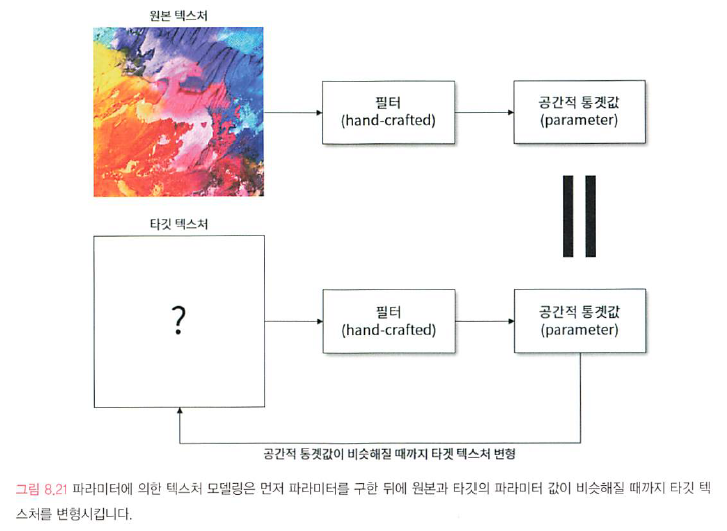

In [ ]:
Image('/content/drive/My Drive/DeepLearning/Start!_Tensorflow/images/target_tec.png', width=500)

이런 설계에서 필터 부분에 컨볼루션 신경망을 이용하여 자동으로 값을 생성하게 하는 것이다.

여기서는 VGG-19 네트워크를 사용해서 구현하게 되는데 ImageNet 등으로 미리 학습된 VGG-19의 가중치 중 일부를 이용해 이미지의 공간적 통곗값을 구할 수 있다.

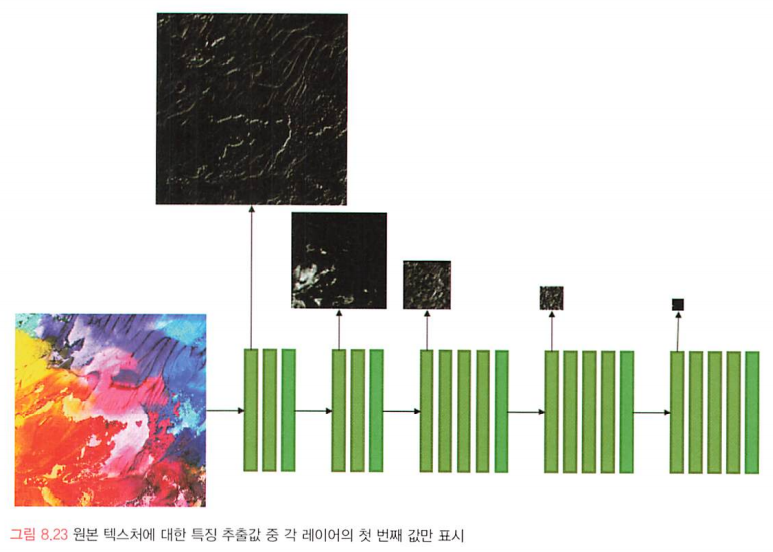

In [ ]:
Image('/content/drive/My Drive/DeepLearning/Start!_Tensorflow/images/style_1.png', width=500)

위 그림에서 단계의 마지막 부분은 pooling을 의미한다.    
색에 집중하는 뉴런도 있고 붓 터치의 모서리에 집중하는 뉴런도 있다.    
이런 특징 추출값을 종합하면 이미지의 공간적 통곗값을 뽑아낼 수 있다.    
이를 위해서 각 레이어의 특징 추출값에서 Gram matrix라는 값을 계산해야 한다.

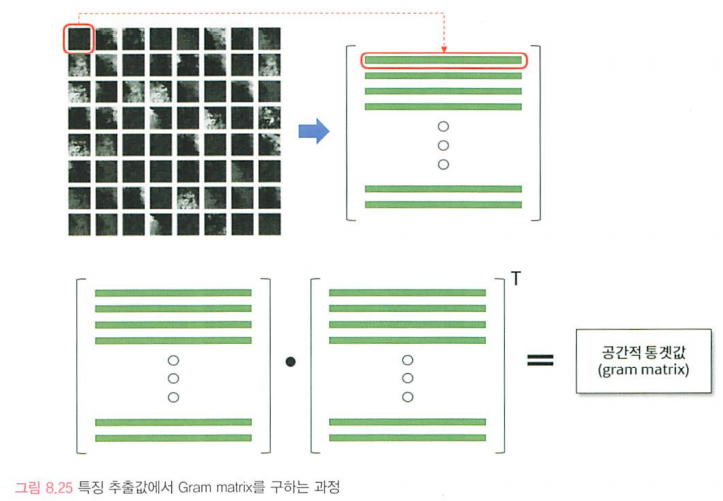

In [ ]:
Image('/content/drive/My Drive/DeepLearning/Start!_Tensorflow/images/style_2.png', width=500)

Gram matrix는 앞에서 본 각 뉴런의 특징 추출값을 1차원의 벡터로 변환한 다음에,    
벡터를 쌓아올린 `행렬을 그 자신의 전치(transpose)(좌상우하 대각 대칭) 행렬과 행렬곱`해서 얻는 값이다.    
이것은 특징 추출값의 자기 자신에 대한 점곱(dot product)과 같다.    
이렇게 얻어진 Gram matrix는 특징 추출값의 상관관계를 나타낸다.

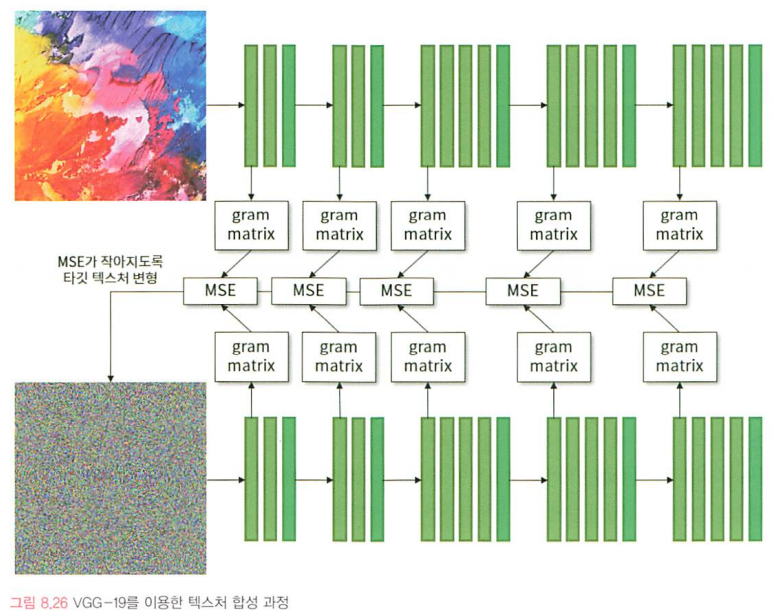

In [ ]:
Image('/content/drive/My Drive/DeepLearning/Start!_Tensorflow/images/style_3.png', width=500)

###원본으로 사용할 텍스처 이미지 불러오기

344064/337723 [==============================] - 0s 0us/step


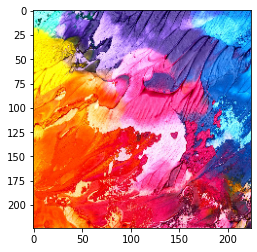

In [ ]:
import matplotlib.pyplot as plt
import cv2

style_path = tf.keras.utils.get_file('style.jpg', 'http://bit.ly/2mGfZIq')

style_image = plt.imread(style_path)
style_image = cv2.resize(style_image, dsize=(224,224))
style_image = style_image / 255.0
plt.imshow(style_image)

스타일을 불러오고 224 사이즈로 맞춰놓는다. 사이즈는 상관없다.    
다음으로는 타깃 텍스처로 사용할 이미지를 만든다. 처음 타깃 텍스처는 0에서 1사이의 랜덤한 값을 구하고 각 픽셀의 RGB 값에 넣으면 랜덤 노이즈 이미지가 생성된다.

###타깃 텍스처 생성

tf.Tensor([0.34456038 0.8394741  0.17285216], shape=(3,), dtype=float32)


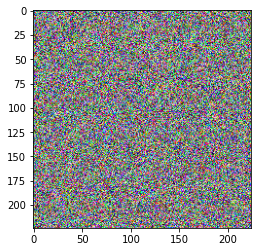

In [ ]:
target_image = tf.random.uniform(style_image.shape)
print(target_image[0,0,:])
plt.imshow(target_image)

224, 224, 3 사이즈의 타깃 텍스처가 생성되었다.    
다음으로 텍스처 합성에 사용할 VGG-19 네트워크를 불러온다.    
각 레이어에 접근하기 쉽게 tf.keras에서 네트워크를 불러온다.

###VGG-19 모델 불러오기

In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input

vgg = VGG19(include_top = False, weights='imagenet')

for layer in vgg.layers:
  print(layer.name)

input_3
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


include_top 인수를 False로 지정하면 Dense 레이어를 제외한 나머지 레이어를 불러올 수 있다.    
vgg 변수에 로드된 네트워크는 컨볼루션과 풀링 레이어인데 이 중 어느 레이어를 이용해야 하는지는 반복적 실험을 통해 좋은 값을 얻어야한다. Gram matrix가 지역적인 구조와 전체적인 구조를 모두 잡아낼 수 있도록 앞쪽과 뒤쪽의 레이어를 모두 사용하는 것이 좋다.

###특징 추출 모델 만들기

In [ ]:
style_layers = ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1']
vgg.trainable = False
outputs = [vgg.get_layer(name).output for name in style_layers]
model = tf.keras.Model([vgg.input], outputs)

레이어의 단락별 컨볼루션 레이어를 고르게 선택해서 레이어의 이름을 저장하고,     
불러와진 VGG-19 네트워크의 기종 가중치는 학습되지 않게 얼려 놓는다.    
다음으로 선택된 다섯 개의 레이어를 출력으로 하는 새로운 모델을 만들었다.(?)

###Gram matrix 계산 함수 재정의

In [ ]:
def gram_matrix(input_tensor):
  channels = int(input_tensor.shape[-1])
  a = tf.reshape(input_tensor, [-1, channels])
  n = tf.shape(a)[0]
  gram = tf.matmul(a, a, transpose_a=True)
  return gram / tf.cast(n, tf.float32)

####tf.reshape(a, [-1, b]) 
: 배열 a를 원래 크기를 유지하며 재배열 ex) a가 (3,2,3) shape일때, tf.reshape(a, [-1, 6]이면 (3, 6) shape로 변환된다.


####tf.matmul(a, a, transpos_a=True)
: 배열 a와 a를 곱한다. transpos_a는 앞과 뒤 인수중 전치행렬 곱을 할지 선택하는 인수이다. (앞 배열의 전치는 a, 뒤 배열의 전치는 b)    
  직접 전치행렬을 만들거나 transpos_a 인수를 True로 지정하면 된다.

먼저 입력된 특징 추출값의 형태를 벡터로 변환한다. 예를 들어, 첫 번째 레이어인 block1_conv1을 통과한 특징 추출값의 차원 수는 (224, 224, 64)이다. 이것을 맨 뒤의 차원(채널)인 64만 남기고 나머지를 1차원 벡터로 만들면 (50176, 64)가 된다.

transpose_a가 True이기 때문에 행렬곱 계산 결과의 차원은 [64, 50176]x[50176, 64] = [64, 64]가 된다.    
마지막 행에서 `1차원 벡터 길이인 50176으로 Gram matrix 값을 나누는데 이렇게 벡터의 길이(또는 특징 추출값 이미지의 넓이)로 나누지 않으면 앞쪽에 오는 레이어일수록 특징 추출값의 이미지가 크기 때문에 Gram matrix 값도 커져서 큰 영향을 줄 것이다.`

#### !벡터의 길이로 Gram matrix를 나누는 이유?
이 말의 의미가 행렬 곱할 때 64x64사이즈로 작아졌지만 그 값들은 행렬의 인수들의 곱이 벡터의 길이 수 만큼 합쳐졌기 때문인가?

###이미지 정규화와 차원 증가

In [ ]:
style_image = plt.imread(style_path)
style_image = cv2.resize(style_image, dsize=(224, 224))
style_image = style_image / 255.0

style_batch = style_image.astype('float32')
style_batch = tf.expand_dims(style_batch, axis=0)
style_output = model(preprocess_input(style_batch * 255.0))

첫 세줄을 이미지의 resize 후에 픽셀 정규화의 내용이다.    
그 다음으로 나오는 것은 정규화된 이미지를 가장 앞에 한차원 증가시킨다.(224,224,3) -> (1,224,224,3)    
후에 이미 저장한 model에 원본 이미지를 넣는다. 하지만 모델은 0~255의 픽셀값이 들어온다고 가정하고 만들어졌기 때문에 다시 255.0을 곱한다.    
style_output은 다섯 레이어를 통과한 특징 추출값으로 구성돼 있다. 그중하나를 출력해보자.

###특징 추출값 확인

(1, 224, 224, 64)


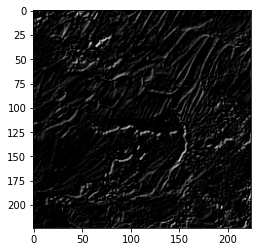

In [ ]:
print(style_output[0].shape)
plt.imshow(tf.squeeze(style_output[0][:,:,:,0], 0), cmap='gray')

위에서 봤던 특징 추출값을 확인할 수 있다.    
이제 원본 텍스처의 Gram matrix 값을 계산한다. 또, 값을 그래프 분포로 확인해보자.

###그래프로 값 확인

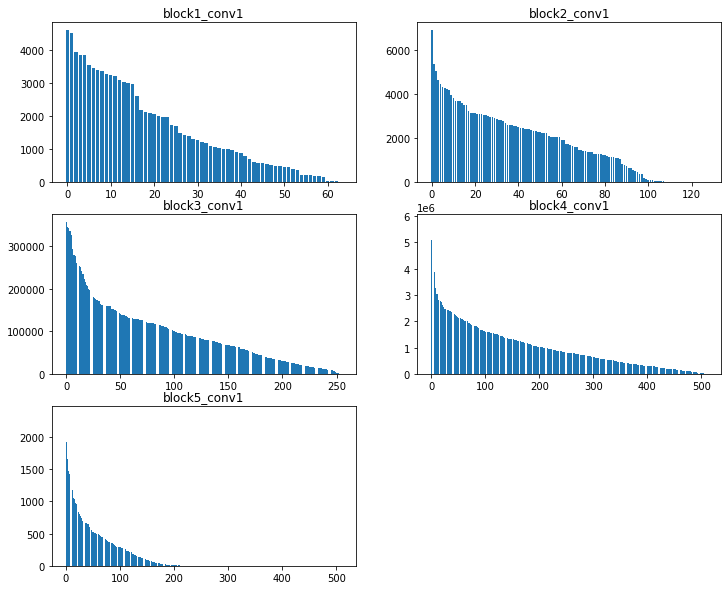

In [ ]:
style_outputs = [gram_matrix(out) for out in style_output]

plt.figure(figsize=(12,10))
for c in range(5):
  plt.subplot(3,2,c+1)
  array = sorted(style_outputs[c].numpy()[0].tolist())
  array = array[::-1]
  plt.bar(range(style_outputs[c].shape[0]), array)
  plt.title(style_layers[c])
plt.show()

Gram matrix 값은 레이어마다 다르게 나오고 최댓값도 크게 차이난다. 각 레이어에서 계산되는 Gram matrix 값에 가중치를 곱해주는 방법으로 특정한 레이어가 너무 큰 영향을 끼치지 못하도록 제어할 수도 있다. 하지만 여기서는 가중치 없이 계산해 보자.    
    
타깃 텍스처를 업데이트하기 위해 몇 가지 함수를 설정해야 한다. 먼저 타깃 텍스처에서 Gram matrix를 구하는 함수가 필요하다. 위에서 Gram matrix 값을 구한 코드를 그대로 사용하며 함수로 묶어주고, 인수 자리에 텍스처 이미지를 넣으면 된다.    
    
그리고 원본 텍스처의 Gram matrix 값과 타깃 텍스처의 Gram matrix 사이의 MSE 를 구하는 함수가 필요하다. 또 나오는 값이 0.0에서 1.0 사이의 컬러 값이어야 하기 때문에 그 이하나 이상으로 값이 넘어가지 않게 해주는 함수가 필요하다.

###타깃 텍스터 업데이트 함수 정의

In [ ]:
def get_outputs(image):
  image_batch = tf.expand_dims(image, axis=0)
  output = model(preprocess_input(image_batch * 255.0))
  outputs = [gram_matrix(out) for out in output]
  return outputs

def get_loss(outputs, style_outputs):
  return tf.reduce_sum([tf.reduce_mean((o-s)**2) for o, s in zip(outputs, style_outputs)])

def clip_0_1(image):
  return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)

get_outputs()가 타깃 텍스처의 Gram matrix를 구하는 함수이다.    
get_loss()는 타깃 텍스처와 원본 텍스처의 Gram matrix 값의 MSE를 구하는 함수이고, 각 레이어의 MSE를 구한 다음에 최종 손실을 반환한다.    
clip_0_1()은 이미지의 픽셀 컬러 값이 0.0에서 1.0 사이에 위치하도록 벗어나느 값을 잘라주는 함수이다.

다음은 가장 중요한 부분인 `이미지를 업데이트하는 부분에 대한 함수 정의`이다.    
지금까지는 tf.keras를 이용해 모델을 정의하고 fit을 이용해 가중치를 학습하는 방식이었지만,    
여기서는 학습해야할 가중치가 없고 2개의 이미지와 Gram matrix의 차이인 MSE 뿐이다.    
이런 상황의 간편한 해결책이 `텐서플로의 GradientTape`이다.    
`어떤 식이 들어가더라도 자동 미분을 통해 입력에 대한 손실을 구한 뒤 다른 변수에 대한 Gradient를 계산`한다.    
여기서 다른 변수는 입력이 될 수도 있고, 가중치가 될 수도 있다.    
중요한 점은 `GradientTape의 계산 과정 안에 묶인 변수에 대한 Gradient여야 한다`는 점이다.    
Gradient를 안다는 것은 입력과 가중치가 손실 함수에 대해 얼마나 좋은지 나쁜지를 안다는 것과 동일한 말이다. 가중치에 대해 Gradient를 구했다면 가중치에 Gradient를 적용해서 좀더 좋은 결과가 나오게 할 수 있고, 입력에 대한 Gradient를 구했다면 마찬가지로 입력에 Gradient를 적용할 수 있다.

###tf.function과 GradientTape를 이용한 이미지 업데이트 함수 정의

In [ ]:
opt = tf.optimizers.Adam(learning_rate=0.2, beta_1=0.99, epsilon = 1e-1) 

@tf.function()
def train_step(image):
  with tf.GradientTape() as tape:
    outputs = get_outputs(image)
    loss = get_loss(outputs, style_outputs)

  grad = tape.gradient(loss, image)
  opt.apply_gradients([(grad, image)])
  image.assign(clip_0_1(image))

####Adam의 인수
beta_1 : 부동 소수점 값 또는 고정 실수 텐서    
epsilon : 수치적 안정성을 위한 작은 상수

첫 줄은 최적화 함수의 정의이다. 논문에서는 L-BFGS라는 최적화 함수를 썼지만, 우리에게 익숙한 Adam optimizer가 속도는 더 빠르고 결과물은 비슷하다. 최적화 함수는 전체적인 학습 속도를 조정하는 역할이다.    
    
@tf.function은 데코레이터로 함수나 클래스 앞에 오면서 기존 코드에 간편하게 기능을 추가하는 것이다.    
    
`tf.function 함수는 train_step(image) 함수를 인수로 받아서 Autograph라는 강력한 기능을 추가한다.` Autograph는 파이썬 문법으로 텐서플로의 핵심인 그래프를 컨트롤 할 수 있게 해준다.    
텐서플로의 그래프는 텐서플로 계산 단위인 텐서(tensor)를 연산하기 위한 계산식이다.    
특히 tf.function은 해당 장식자를 사용한 함수에서 호출되는 다른 함수도 그래프에 자동으로 포함시킨다. 그리고 GradientTape은 계산에 관계되는 모든 변수와 연산을 추적하기 때문에 퍼포먼스에 영향을 주는데 `tf.function 장식자를 붙이면 이 연산들을 고성능의 그래프 연산으로 변환하기 때문에 퍼포먼스를 개선할 수 있다.`

GradientTape()는 보통 with와 함께 사용한다. with는 tape라는 이름의 새로운 GradientTape의 인스턴스를 생성해 참조한다. 앞에서 설명한대로 get_output(image), get_loss(outputs, style_outputs)함수는 tf.function 장식자를 쓰지 않았지만 호출함 함수에 장식자가 붙었기 때문에 텐서플로의 그래프에 자동으로 포함된다.

tape.gradient(loss, image)는 with 구문 안에서 발생한 계산을 추적해서 입력값인 image에 대한 loss의 gradient를 계산한다. 계산된 gradient는 Adam optimizer를 통해 image에 영향을 준다. 즉, 입력값인 image는 이 계산으로 변화한다. 마지막 줄은 계산 결과를 다시 컬러값이 0.0과 1.0사이에 머물게하는 것이다.    
    
이제 앞에서 정의한 train_step(image) 함수를 반복적으로 실행해서 텍스처를 합성해보자.

###텍스처 합성 알고리즘 실행

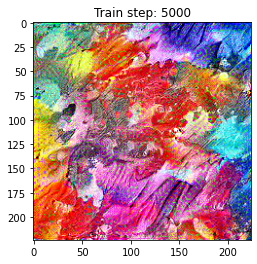

Total time: 111.6


In [ ]:
import IPython.display as display
import time
import imageio

start = time.time()

image = tf.Variable(target_image)

epochs = 50
steps_per_epoch = 100

step = 0
for n in range(epochs):
  for m in range(steps_per_epoch):
    step += 1
    train_step(image)
  if n%5 == 0 or n == epochs -1:
    imageio.imwrite('style_epoch_{0}.png'.format(n), image.read_value().numpy())
  display.clear_output(wait=True)
  plt.imshow(image.read_value())
  plt.title("Train step: {}".format(step))
  plt.show()

end = time.time()
print("Total time: {:.1f}".format(end-start))

타깃 텍스처에 tf.Variable을 씌워서 image라는 변수로 저장한다. 텐서플로에서 그래프 연산을 하는 tensor는 tf.Variable이나 tf.Constant 등에 저장돼야 한다. tf.keras에서는 넘파이 array를 넘겨도 자동으로 이런 변환을 해줬지만 여기서는 직접한다.    
중첩 for 문에서는 에포크당 100 step씩 train_step(image) 함수를 실행시킨다.

이미지에 생기는 자글자글한 노이즈를 개선하기 위해서는 전체 손실에 variation loss라는 것을 추가해볼 수 있다. `variation loss란 어떤 픽셀과 바로 옆에 인접한 픽셀의 차이`이다. 이 차이가 작을수록 이미지는 매끄럽게 보일 것이다.

###노이즈 제거를 위한 variation loss 추가

In [ ]:
def high_pass_x_y(image):
  x_var = image[:,1:,:] - image[:,:-1,:]
  y_var = image[1:,:,:] - image[:-1,:,:]
  return x_var, y_var

def total_variation_loss(image):
  x_deltas, y_deltas = high_pass_x_y(image)
  return tf.reduce_mean(x_deltas**2) + tf.reduce_mean(y_deltas**2)

high_pass_x_y(image) 함수에서는 입력된 image의 x축 방향과 y축 방향의 차이를 구한다. 이렇게 구한 x_var는 image가 (224, 224, 3)의 Shape일 때 (224, 223, 3)이 되고 y_var는 (223, 224, 3)으로 각각 x, y방향으로 1픽셀씩 작은 이미지가 된다.    
total_variation_loss(image) 함수에서는 이렇게 구한 x, y 축 방향의 차이를 제곱해서 평균을 낸 다음 합해서 반환한다.    
왜 variational loss가 필요한지 원본 텍스처와 타깃 텍스처, 그리고 랜덤 노이즈 텍스처의 variation loss를 비교해보자.

In [ ]:
print('target  :', total_variation_loss(image.read_value()))
print('noise   :', total_variation_loss(tf.random.uniform(style_image.shape)))
print('original:', total_variation_loss(style_image))

target  : tf.Tensor(0.09821378, shape=(), dtype=float32)
noise   : tf.Tensor(0.33295083, shape=(), dtype=float32)
original: tf.Tensor(0.03641251305469578, shape=(), dtype=float64)


타깃 텍스처의 variation loss는 랜덤 노이즈의 1/3 정도로 작지만 원본 텍스처보다는 3배 정도 크다. 이 차이가 줄어들면 타깃 텍스처는 원본 텍스처에 더 가까운 모습을 보일 것이라고 가정하고 variation loss를 전체 손실 계산식에 추가한다.

In [ ]:
total_variation_weight = 1e9
style_weight = 1e-1

@tf.function()
def train_step(image):
  with tf.GradientTape() as tape:
    outputs = get_outputs(image)
    loss = style_weight * get_loss(outputs, style_outputs)
    loss += total_variation_weight * total_variation_loss(image)

  grad = tape.gradient(loss, image)
  opt.apply_gradients([(grad, image)])
  image.assign(clip_0_1(image))

지금까지 구한 Gram matrix를 style loss라고 부르자. 이 style loss와 새로 추가된 variation loss에 각각 가중치를 곱해서 전체 손실에 더한다. variation loss는 Gram matrix 계산값에 비해 작기 때문에 큰 가중치를 곱하고, 반대로 style loss는 값을 줄여 준다. 여기에 들어가는 가중치인 total_variation_weight와 style_weight는 적절한 값을 찾을 때 까지 꾸준한 실험이 필요하다.

###variation loss를 추가한 텍스처 합성 알고리즘 실행

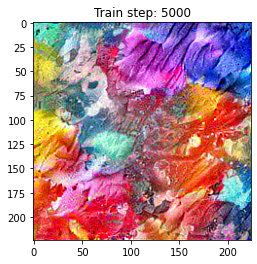

Total time: 110.7


In [ ]:
start = time.time()

target_image = tf.random.uniform(style_image.shape)
image = tf.Variable(target_image)
epochs = 50
steps_per_epoch = 100

step = 0
for n in range(epochs):
  for m in range(steps_per_epoch):
    step += 1
    train_step(image)
  if n % 5 == 0 or n == epochs -1:
    imageio.imwrite('style_variation_epoch_{0}.png'.format(n), image.read_value().numpy())
    display.clear_output(wait=True)
    plt.imshow(image.read_value())
    plt.title("Train step: {}".format(step))
    plt.show()

end = time.time()
print("Total time: {:.1f}".format(end-start))

In [ ]:
print('target    :', total_variation_loss(image.read_value()))
print('original  :', total_variation_loss(style_image))

target    : tf.Tensor(0.034242094, shape=(), dtype=float32)
original  : tf.Tensor(0.03641251305469578, shape=(), dtype=float64)


타깃 텍스처의 variation loss가 원본 텍스처보다도 더 작아진 것을 확인할 수 있다. 결과 이미지도 style loss만 사용했을 때보다 매끄럽게 변했다.

###8.3.2 컨볼루션 신경망을 사용한 신경 스타일 전이

신경 스타일 전이는 위에서 배운 Gram matrix를 이용한 텍스처 합성에 한가지를 더 추가한 것이다. 그것은 `content 텍스처`이다. 타깃 텍스처를 말들기 위해서 style 텍스처와 Gram matrix의 MSE를 구하고, content 텍스처와는 픽셀 값의 차이인 MSE를 구한다. 이 두가지 특징 추출값을 위한 레이어는 서로 다르게 설정할 수 있다.

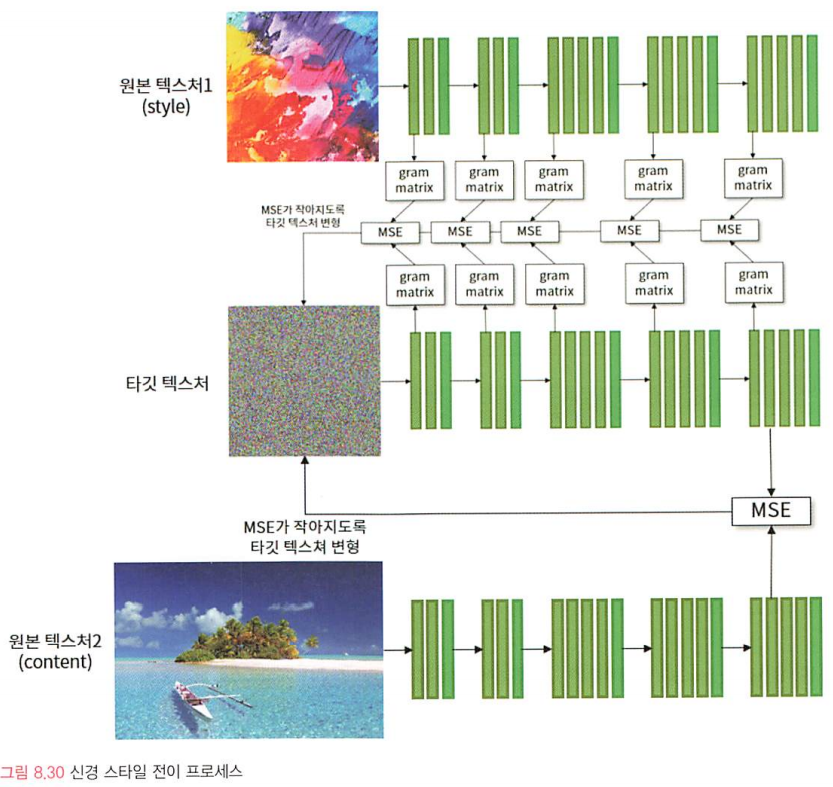

In [ ]:
Image('/content/drive/My Drive/DeepLearning/Start!_Tensorflow/images/content_tec_1.png', width=700)

그림처럼 style loss를 위해 다섯 개의 레이어에서 gram matrix 값을 계산하는 데 비해 content loss를 위해서는 뒤쪽의 한 개 레이어에서 얻은 특징 추출값만 사용한다.

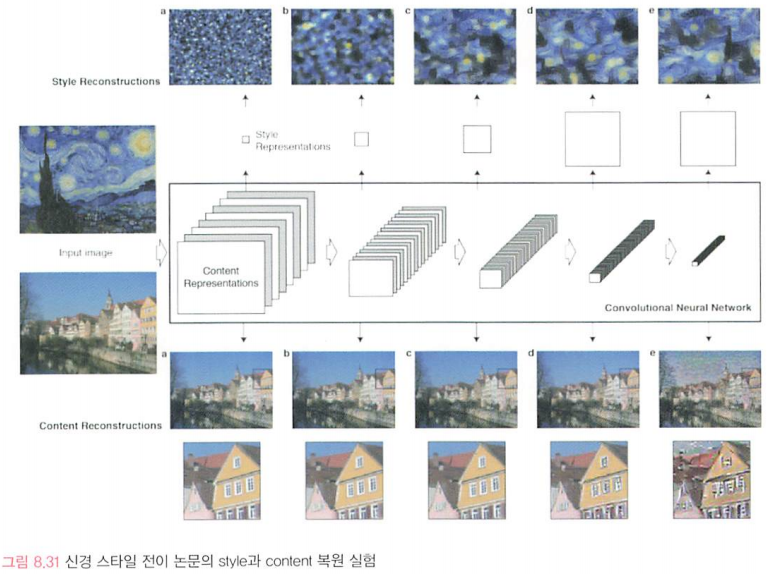

In [ ]:
Image('/content/drive/My Drive/DeepLearning/Start!_Tensorflow/images/content_tec_2.png', width=700)

그림에 VGG 네트워크가 각 레이어에서 뽑은 특징 추출값에서 그림을 복원해본 결과물이 나와있다.    
윗줄은 style을 복원한 것이고, 아랫줄은 content를 복원한 것이다.

신경스타일 전이로 얻고자 하는 것은 아래와 같이 content 구조의 모사이기 때문에 뒤쪽 레이어를 사용한다. style loss를 구할 때 처럼 content loss를 구할 때 앞쪽 레이어의 특징 추출을 같이 사용할 수도 있다. 하지만 이 경우 content 이미지의 세부를 그대로 복사하는 결과를 불러올 수 있기 때문에 loss를 계산하기 위해서는 뒤쪽의 레이어 중 한 개의 특징 추출만 사용했습니다.

앞부분에서 스타일 요소가 빠진 후 뒤쪽에 구조적 정보를 뽑아내서 사용한다.

####content 원본 텍스처 불러오기

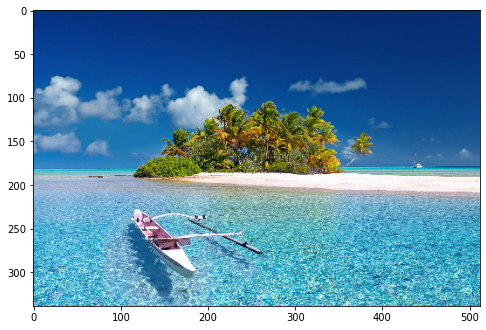

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

content_path = tf.keras.utils.get_file('content.jpg', 'http://bit.ly/2mAfUX1')

content_image = plt.imread(content_path)
max_dim = 512
long_dim = max(content_image.shape[:-1])
scale = max_dim / long_dim
new_height = int(content_image.shape[0] * scale)
new_width = int(content_image.shape[1]* scale)

content_image = cv2.resize(content_image, dsize=(new_width, new_height))
content_image = content_image / 255.0
plt.figure(figsize=(8,8))
plt.imshow(content_image)

VGG-19 신경망은 32보다 큰 이미지는 모두 받을 수 있기 때문에 적절한 퍼포먼스를 유지하기 위해 적당히 크게 설정했다.    
한 가지 주의할 점은 `content 텍스처와 타깃 텍스처의 크기가 같아야 한다`는 점이다. 이 둘은 서로 `특징 추출값의 픽셀을 MSE로 비교하기 때문에 크기가 다르면 안된다.` 반면 `style 텍스처는 타깃 텍스처와 크기가 달라도 상관없다. Gram matrix 계산값은 각 레이어의 [채널 수]x[채널 수]만큼의 값을 서로 비교하기 때문`이다.

이제 content의 특징을 추출하기 위한 모델을 만들어보자.

####특징 추출 모델 생성

In [ ]:
content_batch = content_image.astype('float32')
content_batch = tf.expand_dims(content_batch, axis=0)

content_layers = ['block5_conv2']

vgg.trainable = False
outputs = [vgg.get_layer(name).output for name in content_layers]
model_content = tf.keras.Model([vgg.input], outputs)
content_output = model_content(preprocess_input(content_batch*255.0))

content 특징 추출을 위해 선택한 레이어는 block5_conv1 바로 뒤에 있는 block5_conv2 레이어이다. 위에서 style 특징을 추출하는 모델과 별도의 모델을 만들어서 model_content에 저장하고, 이 모델을 사용해 content 텍스처에서 미리 특징을 추출해서 content_output 변수에 저장해 놓는다. style_outputs처럼 이값도 여기서 한번만 계산해놓으면 바뀌지 않고 계속 사용되는 값이다.

####content output, loss 함수 정의

In [ ]:
def get_content_output(image):
  image_batch = tf.expand_dims(image, axis=0)
  output = model_content(preprocess_input(image_batch * 255.0))
  return output

def get_content_loss(image, content_output):
  return tf.reduce_sum(tf.reduce_mean(image-content_output)**2)

get_content_loss 함수에서는 타깃의 텍스터와 content 텍스처의 MSE를 구한다.    
그 다음으로 content loss를 계산식에 추가하고, 모델의 하이퍼파라미터인 Adam optimizer의 학습률과 각 loss의 가중치들을 신경 스타일 전이 과제에 맞게 조정한다.

####content loss를 손실 계산식에 추가

In [ ]:
opt = tf.optimizers.Adam(learning_rate=0.001, beta_1=0.99, epsilon=1e-1)

total_variation_weight= 1e9
style_weight = 1e-2
content_weight =1e4

@tf.function()
def train_step(image):
  with tf.GradientTape() as tape:
    outputs = get_outputs(image)
    output2 = get_content_output(image)
    loss = style_weight * get_loss(outputs, style_outputs)
    loss += content_weight * get_content_loss(output2, content_output)
    loss += total_variation_weight * total_variation_loss(image)

  grad = tape.gradient(loss, image)
  opt.apply_gradients([(grad, image)])
  image.assign(clip_0_1(image))

####신경 스타일 전이 실행

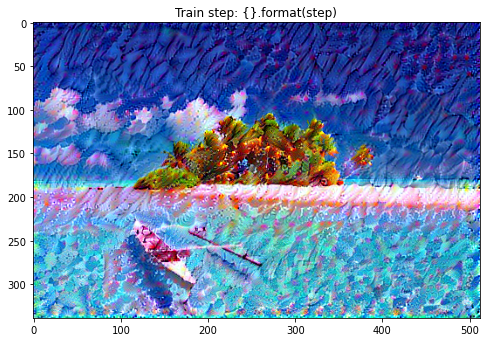

Total time: 233.5


In [ ]:
start = time.time()

#target_image = tf.random.uniform(content_image.shape)
image = tf.Variable(content_image.astype('float32'))

epochs = 20
steps_per_epoch = 100

step = 0
for n in range(epochs):
  for m in range(steps_per_epoch):
    step += 1
    train_step(image)
    print(".", end='')
  if n % 5 == 0 or n == epochs -1:
    imageio.imwrite('style_{0}_content_{1}_trainsfer_epoch_{2}.png'.format(style_weight, content_weight, n), image.read_value().numpy())
  display.clear_output(wait=True)
  plt.figure(figsize=(8,8))
  plt.imshow(image.read_value())
  plt.title("Train step: {}".format(step))
  plt.show()

end = time.time()
print("Total time: {:.1f}".format(end-start))

학습 시간을 절약하기 위해서 타깃 텍스처를 랜덤 노이즈가 아닌 content 텍스처에서 시작하게 했다.   
하지만 이미지도 커졌고 content loss도 추가됐기 때문에 시간이 오래 걸린다.    
학습률, 가중치 등의 파라미터를 변화시키면서 원하는 결과를 얻기위해 노력해보자.    
에포크가 진행됨에 따라 타깃 텍스처가 달라지기 때문에 적절한 에포크에서 멈추는 것도 중요하다.

##정리

이번 장에서는 사전 훈련된 네트워크를 쉽게 검색해볼 수 있는 텐서플로 허브의 사용법을 배웠다.   
또, tf.krase에 올라와 있는 사전 훈련된 네트워크를 받아서 활용하는 방법도 배웠다.    
    
사전 훈련된 모델을 단순히 활용하는 것 외에도 재학습시키거나 특징 추출기로 사용하는 전이 학습에 대해서도 살펴봤다.    
    
마지막 절에서는 딥러닝을 예술에 활용한 신경 스타일 전이와 style loss만을 이용한 텍스처 합성에 대해 다뤄봤다.